In [50]:
import pandas as pd

df = pd.read_csv('laptops.csv')
# Drop duplicate rows across all columns
df = df.drop_duplicates()
# Drop rows with missing data across all columns
df = df.dropna()
# Drop column: 'index'
df = df.drop(columns=['index'])
print(df.head())

    brand                                              Model  Price  Rating  \
0   tecno  Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...  23990      63   
1   tecno  Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...  35990      67   
2      hp  HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...  51100      73   
3    acer  Acer Extensa EX214-53 Laptop (12th Gen Core i5...  39990      62   
4  lenovo  Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...  28580      62   

  processor_brand processor_tier  num_cores  num_threads  ram_memory  \
0           intel        core i3          2            4           8   
1           intel        core i7          4            8          16   
2             amd        ryzen 5          6           12           8   
3           intel        core i5         12           16           8   
4             amd        ryzen 3          4            8           8   

  primary_storage_type  ...  secondary_storage_type  \
0                  SSD  ...    No sec

In [51]:
# Split text using regex '\s' in column: 'Model'
import pandas as pd
loc_0 = df.columns.get_loc('Model')
df_split = df['Model'].str.split(pat='\\s', expand=True).add_prefix('Model_')
df = pd.concat([df.iloc[:, :loc_0], df_split, df.iloc[:, loc_0:]], axis=1)
df = df.drop(columns=['Model'])

# Rename column 'Model_1' to 'Model_type'
df = df.rename(columns={'Model_1': 'Model_type', 'Model_2': 'Model_series'})

In [52]:
# Drop columns: 'Model_0', 'Model_2' and 19 other columns
df = df.drop(columns=['Model_0', 'Model_3', 
                      'Model_4', 'Model_5', 'Model_6', 
                      'Model_7', 'Model_8', 'Model_9', 
                      'Model_10', 'Model_11', 'Model_12', 
                      'Model_13', 'Model_14', 'Model_15', 
                      'Model_16', 'Model_17', 'Model_18', 
                      'Model_19', 'Model_20', 'Model_21'])

In [53]:
print(df.describe(include="all"))

       brand Model_type Model_series          Price      Rating  \
count    991        991          991     991.000000  991.000000   
unique    26        157          255            NaN         NaN   
top     asus   Vivobook           15            NaN         NaN   
freq     210        123           82            NaN         NaN   
mean     NaN        NaN          NaN   77266.504541   63.931382   
std      NaN        NaN          NaN   57384.910269   10.190575   
min      NaN        NaN          NaN    9800.000000   24.000000   
25%      NaN        NaN          NaN   43595.000000   58.000000   
50%      NaN        NaN          NaN   61900.000000   64.000000   
75%      NaN        NaN          NaN   89245.000000   71.000000   
max      NaN        NaN          NaN  454490.000000   89.000000   

       processor_brand processor_tier   num_cores  num_threads  ram_memory  \
count              991            991  991.000000   991.000000  991.000000   
unique               4             15  

In [37]:
print(df.describe(include="object"))

       brand Model_type processor_brand processor_tier primary_storage_type  \
count    991        991             991            991                  991   
unique    26        157               4             15                    2   
top     asus   Vivobook           intel        core i5                  SSD   
freq     210        123             705            335                  964   

       secondary_storage_type gpu_brand    gpu_type       OS year_of_warranty  
count                     991       991         991      991              991  
unique                      2         5           3        7                4  
top      No secondary storage     intel  integrated  windows                1  
freq                      976       462         616      924              900  


In [54]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   brand                       991 non-null    object 
 1   Model_type                  991 non-null    object 
 2   Model_series                991 non-null    object 
 3   Price                       991 non-null    int64  
 4   Rating                      991 non-null    int64  
 5   processor_brand             991 non-null    object 
 6   processor_tier              991 non-null    object 
 7   num_cores                   991 non-null    int64  
 8   num_threads                 991 non-null    int64  
 9   ram_memory                  991 non-null    int64  
 10  primary_storage_type        991 non-null    object 
 11  primary_storage_capacity    991 non-null    int64  
 12  secondary_storage_type      991 non-null    object 
 13  secondary_storage_capacity  991 non

In [39]:
df['brand'].value_counts()

brand
asus         210
hp           205
lenovo       201
dell         106
msi           90
acer          89
apple         15
infinix       13
samsung        7
zebronics      7
lg             7
ultimus        6
fujitsu        5
avita          5
wings          4
chuwi          4
realme         2
microsoft      2
tecno          2
axl            2
honor          2
gigabyte       2
primebook      2
jio            1
walker         1
iball          1
Name: count, dtype: int64

In [40]:
df['gpu_brand'].value_counts()

gpu_brand
intel     462
nvidia    343
amd       167
apple      15
arm         4
Name: count, dtype: int64

In [41]:
df['processor_brand'].value_counts()

processor_brand
intel    705
amd      267
apple     15
other      4
Name: count, dtype: int64

In [42]:
# Mean Price from the brand

df["Price"].groupby([df["brand"]]).mean()

brand
acer          62847.876404
apple        193875.333333
asus          78290.223810
avita         25461.800000
axl           16490.000000
chuwi         28740.000000
dell         101701.132075
fujitsu       82890.800000
gigabyte      80990.000000
honor         49490.000000
hp            76005.604878
iball          9800.000000
infinix       38220.769231
jio           14701.000000
lenovo        65527.562189
lg           115284.714286
microsoft     88740.000000
msi           94260.433333
primebook     13990.000000
realme        39990.000000
samsung       67990.000000
tecno         29990.000000
ultimus       17060.500000
walker        15990.000000
wings         29990.000000
zebronics     39132.857143
Name: Price, dtype: float64

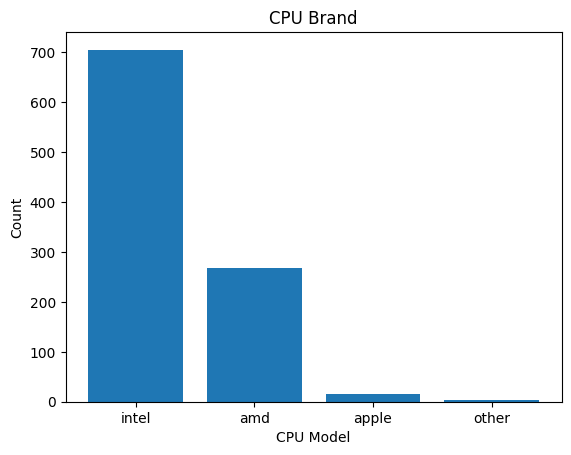

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

df ['processor_brand'].value_counts()
cpu_counts = df ['processor_brand'].value_counts()
top_5_cpu_models = cpu_counts.nlargest(5)

plt.bar(top_5_cpu_models.index, top_5_cpu_models.values)
plt.xlabel('CPU Model')
plt.ylabel('Count')
plt.title('CPU Brand')
plt.show()

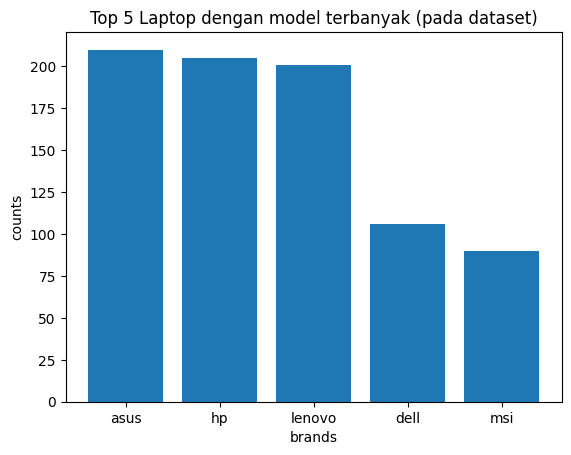

In [48]:
import matplotlib.pyplot as plt

df ['brand'].value_counts()
brand_counts = df ['brand'].value_counts()
top_5_brands = brand_counts.nlargest(5)

plt.bar(top_5_brands.index, top_5_brands.values)
plt.xlabel('brands')
plt.ylabel('counts')
plt.title('Top 5 Laptop dengan model terbanyak (pada dataset)')
plt.show()

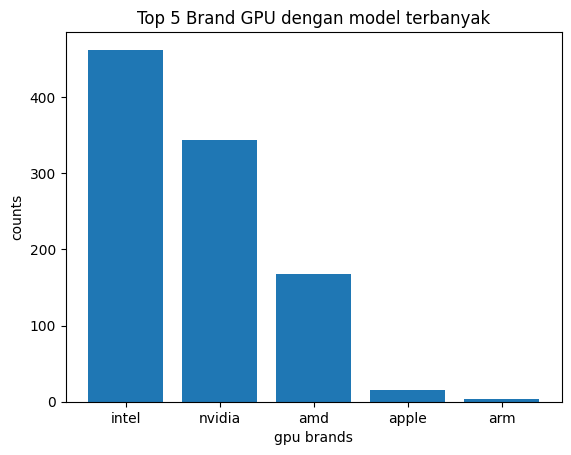

In [45]:
import matplotlib.pyplot as plt

df ['gpu_brand'].value_counts()
brand_counts = df ['gpu_brand'].value_counts()
top_5_gpu_brands = brand_counts.nlargest(5)

plt.bar(top_5_gpu_brands.index, top_5_gpu_brands.values)
plt.xlabel('gpu brands')
plt.ylabel('counts')
plt.title('Top 5 Brand GPU dengan model terbanyak')
plt.show()

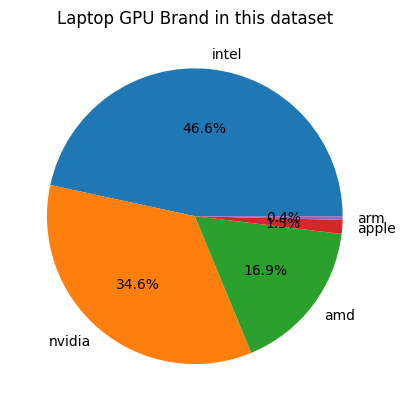

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_laptops_per_os = df['gpu_brand'].value_counts()

# Create a pie chart of the number of laptops for each operating system
plt.pie(n_laptops_per_os.values, labels=n_laptops_per_os.index, autopct="%1.1f%%")
plt.title('Laptop GPU Brand in this dataset')
plt.show()

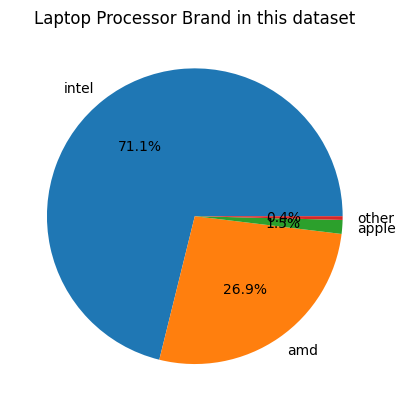

In [47]:
n_laptops_per_os = df['processor_brand'].value_counts()

# Create a pie chart of the number of laptops for each operating system
plt.pie(n_laptops_per_os.values, labels=n_laptops_per_os.index, autopct="%1.1f%%")
plt.title('Laptop Processor Brand in this dataset')
plt.show()